In [1]:
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import json
from drowsiness_detection.config import DATA_PATH

In [2]:
data_files = list()
for file in DATA_PATH.joinpath("20201030_eyegaze_crop_data/").iterdir():
    if file.suffix != ".pz":
        print(file)
    else:
        data_files.append(file)

/home/tim/IM/data/20201030_eyegaze_crop_data/params.json
/home/tim/IM/data/20201030_eyegaze_crop_data/info.txt
/home/tim/IM/data/20201030_eyegaze_crop_data/datasets.json
/home/tim/IM/data/20201030_eyegaze_crop_data/camera_coordinates.PNG


In [5]:
!cat /home/tim/IM/data/20201030_eyegaze_crop_data/info.txt

Each file contains data for a different recorded person.

pz files can be loaded using python as follows:
import pickle, gzip
fn = "PR18100801.pz"
with gzip.open(fn, 'rb') as f:
	data = pickle.load(f, encoding='latin1', fix_imports=True)
	
The data is structured as a python dictionary where the keys are unique video sequence identifiers
and the values are lists where each list item refers to one image/frame of the original video.

Each item of the list contains these keys:
- left_image_crop: an numpy array of unint16 values with the eye crop of the left eye
- right_image_crop: an numpy array of unint16 values with the eye crop of the right eye
- eyegaze_origin: the 3d origin point of the eye gaze in mm (in camera coordinates, see camera_coordinates.png)
- eyegaze_direction: the 3d direction vector the eye gaze (in camera coordinates, see camera_coordinates.png)
- eyegaze_yaw: the horizontal yaw angle of the eyegaze vector relative to the camera coordinate system
- eyegaze_pitch: the ve

![title](/home/tim/IM/data/20201030_eyegaze_crop_data/camera_coordinates.PNG)

In [6]:
with open(DATA_PATH.joinpath("20201030_eyegaze_crop_data/params.json"), encoding="latin1") as f:
    data = json.load(f)
    pprint(data)

{'crop_scale': 2.0,
 'crop_size': [70, 50],
 'predict3d': True,
 'supersampling': True,
 'target_origin': [34.5, 24.5]}


In [7]:
with open(DATA_PATH.joinpath("20201030_eyegaze_crop_data/datasets.json"), encoding="latin1") as f:
    data = json.load(f)
    pprint(sorted(data))

['20200814_1b80ceba_HeadPoseCar_WithWithoutOptitrack',
 '20200814_2457ce72_HeadPoseCar_WithWithoutOptitrack',
 '20200814_47a1037d_Authentication',
 '20200814_5aa4995e_ActivityRecognition_c160601',
 '20200814_61599891_EyesInCar',
 '20200814_a3af4f56_HeadPoseCar_WithWithoutOptitrack',
 '20200814_b0580c0f_EyesInCar',
 '20200814_bc7dbd0b_Authentication',
 '20200814_ef44c450_HeadPoseCar_WithWithoutOptitrack',
 '20200817_033e2163_HeadPoseCar_WithWithoutOptitrack',
 '20200817_120113df_Authentication',
 '20200817_29471741_Authentication',
 '20200817_31cddb77_EyesInCar',
 '20200817_453f427a_ActivityRecognition_c160601',
 '20200817_56321c55_EyesInCar',
 '20200817_6775dee5_EyesInCar',
 '20200817_8598ca81_EyesInCar',
 '20200817_8864333a_Authentication',
 '20200817_932a62fa_Authentication',
 '20200817_ba3fc9e3_EyesInCar',
 '20200817_bb81ca7c_HeadPoseCar_WithWithoutOptitrack',
 '20200817_c958414b_ActivityRecognition_c160601',
 '20200817_d6034f99_HeadPoseCar_WithWithoutOptitrack',
 '20200817_dbe893fb

In [8]:
pprint(data_files)

[PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20100507.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20100715.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20090110.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20081907.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20102209.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20091504.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20100803.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20092430.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20091107.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20101211.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20091112.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20092412.pz'),
 PosixPath('/home/tim/IM/data/20201030_eyegaze_crop_data/PR20092104.pz'),
 PosixPath('/home/tim/IM/data/20201030

## look at first file

In [9]:
import pickle, gzip
with gzip.open(data_files[0], 'rb') as f:
	data = pickle.load(f, encoding='latin1', fix_imports=True)

In [10]:
sorted(data)

['20201006_c45ec956_GazeTargets__20201006_c45ec956_144326',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144428',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144436',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144447',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144505',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144518',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144528',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144538',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144550',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144556',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144619',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144633',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144640',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144655',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144705',
 '20201006_c45ec956_GazeTargets__20201006_c45ec956_144722',
 '20201006_c45ec956_GazeTargets__2020100

In [15]:
data["20201006_c4e46926_Authentication__20201006_c4e46926_143725"]

[{'left_image_crop': None,
  'right_image_crop': None,
  'eyegaze_origin': None,
  'eyegaze_direction': None,
  'left_imagecrop': array([[312, 326, 308, ..., 297, 301, 291],
         [306, 346, 316, ..., 286, 280, 274],
         [316, 322, 338, ..., 269, 270, 286],
         ...,
         [220, 208, 202, ..., 216, 228, 254],
         [192, 204, 212, ..., 248, 262, 258],
         [210, 224, 211, ..., 244, 266, 262]], dtype=uint16),
  'right_imagecrop': array([[453, 458, 442, ..., 536, 536, 508],
         [486, 420, 432, ..., 526, 500, 504],
         [454, 426, 418, ..., 532, 498, 489],
         ...,
         [292, 284, 276, ..., 381, 367, 353],
         [305, 299, 297, ..., 371, 357, 353],
         [290, 293, 294, ..., 358, 345, 357]], dtype=uint16),
  'eyegaze_yaw': None,
  'eyegaze_pitch': None},
 {'left_image_crop': None,
  'right_image_crop': None,
  'eyegaze_origin': None,
  'eyegaze_direction': None,
  'eyegaze_yaw': None,
  'eyegaze_pitch': None},
 {'left_image_crop': None,
  'rig

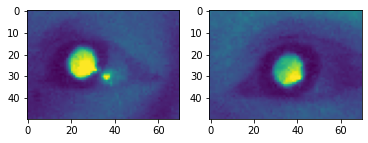

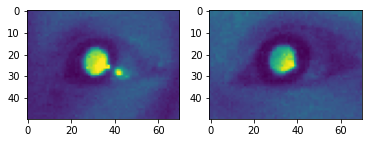

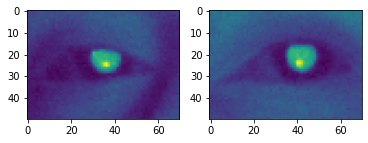

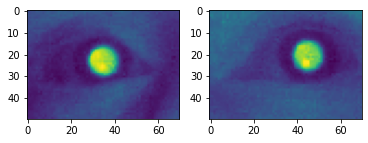

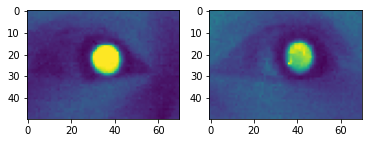

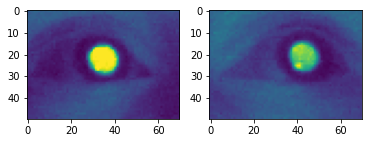

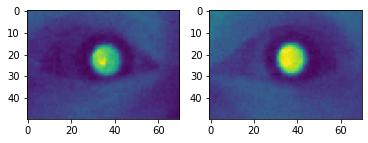

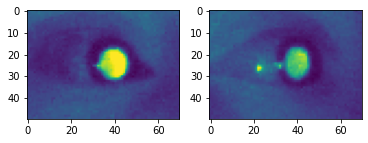

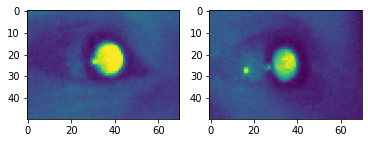

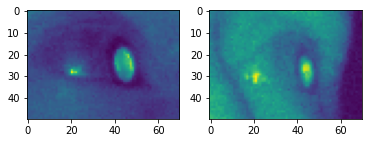

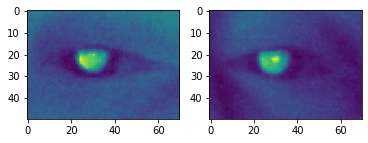

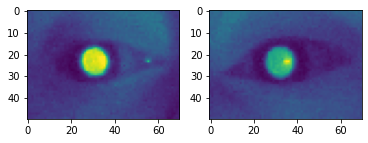

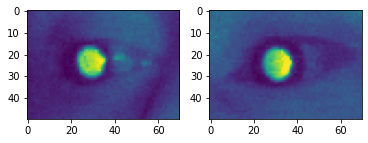

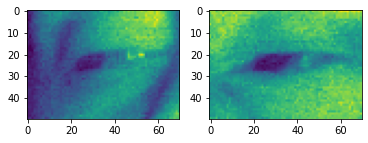

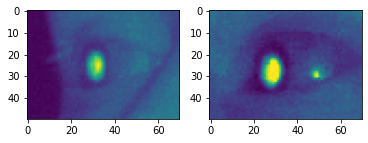

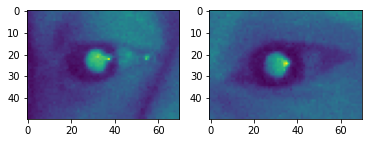

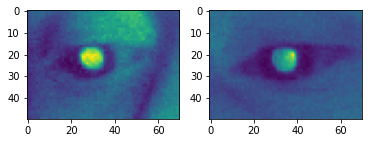

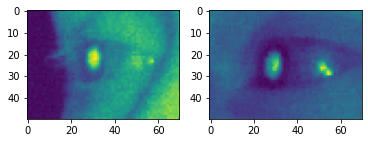

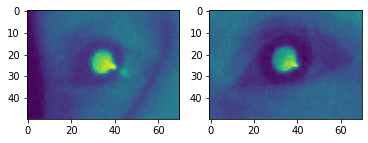

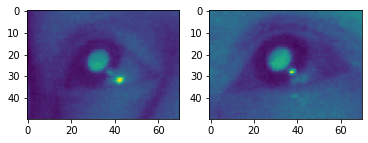

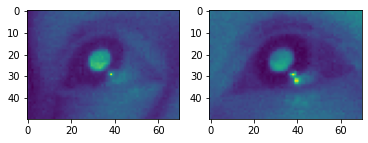

In [14]:
for frame in data["20201006_c4e46926_Authentication__20201006_c4e46926_143725"]:
    if "left_imagecrop" in frame:
        fig, (ax1,ax2) = plt.subplots(1,2)
        ax1.imshow(frame["left_imagecrop"])
        try:
            ax2.imshow(frame["right_imagecrop"])
        except KeyError:
            continue
        plt.show()
        
        

In [ ]:
data